In [73]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.image as mpimg

from shapely.geometry import Polygon, MultiPolygon
import shapely

In [56]:
def get_asset_ids_list(assets):
    """
    Takes a dictionary of assets with weird ids
    as keys and returns a list of those keys
    """
    return list(assets.keys())


def get_asset_meta(assets, idx):
    """
    Return key meta data for a specific asset specified 
    by it's id number (idx)
    """
    linename = assets[idx]['asset']['name']
    path = assets[idx]['asset']['path']
    size = assets[idx]['asset']['size']
    return linename, path, size


def get_asset_regions(assets, idx):
    return assets[idx]['regions']


def make_multi_polygon(regions):
    """
    Iterates over polygon regions and
    returns a Shapely MultiPolygon object
    # ToDo: deal with straight line case. Currently not supported
    """
    polys = []
    for poly in regions:
        points = (poly['points'])
        if len(points) > 2:
            polygon = shapely.geometry.Polygon([(p['x'], p['y']) for p in points])
            polys.append(polygon)
    multi_polygons = shapely.geometry.MultiPolygon(polys)
    return multi_polygons


def make_masked_arrary(size, multi_polygons):
    """
    Returns a masked array the same dimensions of the image data
    Yielding a True inside the fault polygons and a False outside
    """
    width, height= size['height'], size['width']
    x, y = np.mgrid[:height, :width]
    coors = np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 

    masks = np.empty(width*height)
    for poly in list(multi_polygons):
        polygon = list(poly.exterior.coords)
        poly_path = Path(polygon)
        masks += poly_path.contains_points(coors)
    return masks.reshape(height, width).T


def save_mask_output(fault_mask_arr, path, linename, size):
    """
    Save the output mask as the same resolution as the input
    image. 
    """
    height, width= size['height'], size['width']
    print(width, height)
    figsize = (width/400, height/400)
    fig = plt.figure(frameon=False, figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(fault_mask_arr, cmap='Greys')
    plt.savefig(path + linename[:-4] + '.png', dpi=400)
    plt.close("all")
    return

In [57]:
ls

Fault_polygon_masks.ipynb           fault_tiles/
Image_slices_from_3d_seismic.ipynb  seismic_section_upper/
Kerry-Seismic-Tiles-export.json     seismic_sections/
data/                               seismic_tiles/
fault_labels/


In [58]:
# path of json file
input_fname = 'Kerry-Seismic-Tiles-export.json'

# output path
out_path = 'fault_tiles/'

In [59]:
pwd

'/Users/Evan/Documents/GitHub/seismic_image_prep'

In [60]:
with open(input_fname, 'r') as f:
    dump = json.load(f)
    assets = dump['assets']

In [61]:
asset_ids = get_asset_ids_list(assets)

for idx in asset_ids:
    ln, pth, sz = get_asset_meta(assets, idx)
    print(idx, '\n\t', ln, ' '*4, sz, '\n' )
    regions = get_asset_regions(assets, idx)
    if regions:  # some images don't have any polygons
        fault_polygons = make_multi_polygon(regions)
        masked_arr = make_masked_arrary(sz, fault_polygons)
        save_mask_output(masked_arr, out_path, ln, sz)
    else:
        masked_arr = np.zeros((sz['width'], sz['height']))
        save_mask_output(masked_arr, out_path, ln, sz)
        pass

c8b575645cb16726815f39da5b185af9 
	 section_90_6_inline.png      {'width': 750, 'height': 750} 

750 750
81b570a2e486340d7bbe3fd7487b5e55 
	 section_90_5_inline.png      {'width': 750, 'height': 750} 

750 750
a6cbbf537f6a00d30b3401ee633b55ec 
	 section_90_4_inline.png      {'width': 750, 'height': 750} 

750 750
09c80de3e6ff06c81c97e3b85edc134e 
	 section_90_3_inline.png      {'width': 750, 'height': 750} 

750 750
83140ea1ec3a9d98b5b115872263f52e 
	 section_90_2_inline.png      {'width': 750, 'height': 750} 

750 750
4d0625dc0ce8d5b735c20d797a48d795 
	 section_90_1_inline.png      {'width': 750, 'height': 750} 

750 750
936c024faeeea522c434d5c4f0a68469 
	 section_80_6_inline.png      {'width': 750, 'height': 750} 

750 750
b39f6a3564d56fe3dc97fd28c009baa5 
	 section_80_5_inline.png      {'width': 750, 'height': 750} 

750 750
1a667e6fd9b5aed18ec00e1763de2bae 
	 section_80_4_inline.png      {'width': 750, 'height': 750} 

750 750
4a8fc14aec7bac78f52ed1a9738c9920 
	 section_80_3_inline

6894c8f747d548644945ea25dde148f1 
	 section_180_5_inline.png      {'width': 750, 'height': 750} 

750 750
6af58bdb21be27bf7820a819289cefd7 
	 section_180_4_inline.png      {'width': 750, 'height': 750} 

750 750
c5e1e08835a517eeb0a702f5e14b80aa 
	 section_180_3_inline.png      {'width': 750, 'height': 750} 

750 750
645aa256709c990d03950c846d8e38a6 
	 section_180_2_inline.png      {'width': 750, 'height': 750} 

750 750
356a50f76397a00c9f201715db52a798 
	 section_180_1_inline.png      {'width': 750, 'height': 750} 

750 750
76e641167007c5748b41d74ea53f94c8 
	 section_170_6_inline.png      {'width': 750, 'height': 750} 

750 750
4d82d2a2b0a08f0754c94d2b627166cd 
	 section_170_5_inline.png      {'width': 750, 'height': 750} 

750 750
9ccea8bc78c0983030d10259e7442e1a 
	 section_170_4_inline.png      {'width': 750, 'height': 750} 

750 750
2179b554f07d1108af5f494076f5a021 
	 section_170_3_inline.png      {'width': 750, 'height': 750} 

750 750
a75ddc613bd9e34a0e86c9fe677901e7 
	 section_17

In [16]:
pth

'file:/Users/Evan/Documents/GitHub/seismic_image_prep/seismic_section_upper/section_110_inline.png'

In [19]:
pwd

'/Users/Evan/Documents/GitHub/seismic_image_prep'

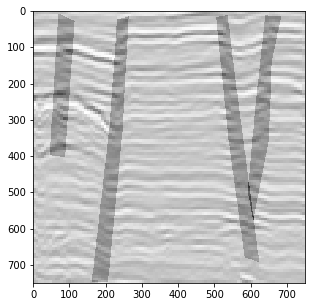

In [63]:
# QC check
file_path_seismic = 'training_data/data/section_30_1_inline.png'
file_path_faults = 'training_data/model/section_30_1_inline.png'
qc_check = True
if qc_check:
    import matplotlib.image as mpimg
    img_seismic = mpimg.imread(file_path_seismic)
    img_faults = mpimg.imread(file_path_faults)
    plt.figure(figsize = (5,5))
    plt.imshow(img_seismic)
    plt.imshow(img_faults, alpha=0.5)
    #for i, poly in enumerate (fault_polygons):
    #    x,y = poly.exterior.xy
    #    plt.plot(x,y)

In [64]:
import glob

In [78]:
datafiles = glob.glob('training_data/data/*.png')
modelfiles = glob.glob('training_data/model/*.png')

In [79]:
i = 1
print(d.split('/')[-1], m.split('/')[-1])
print(d, m)
if d == m:
    img_seismic = mpimg.imread(datafiles[i])
    img_faults = mpimg.imread(modelfiles[i])
    plt.figure(figsize = (5,5))
    plt.imshow(img_seismic)
    plt.imshow(img_faults, alpha=0.5)

section_90_3_inline.png section_30_4_inline.png
training_data/data/section_90_3_inline.png training_data/model/section_30_4_inline.png


In [68]:
datafiles = [name.split('/')[-1] for name in datafiles]
modelfiles = [name.split('/')[-1] for name in modelfiles]


In [77]:
for d, m in zip (datafiles, modelfiles):
    if d == m:
        pass
    else:
        print(d.split('/')[-1], '  ',  m.split('/')[-1])

section_150_1_inline.png    section_150_1_inline.png
section_140_2_inline.png    section_140_2_inline.png
section_160_4_inline.png    section_160_4_inline.png
section_100_2_inline.png    section_100_2_inline.png
section_220_6_inline.png    section_220_6_inline.png
section_110_1_inline.png    section_110_1_inline.png
section_230_5_inline.png    section_230_5_inline.png
section_180_3_inline.png    section_180_3_inline.png
section_120_4_inline.png    section_120_4_inline.png
section_210_3_inline.png    section_210_3_inline.png
section_80_3_inline.png    section_80_3_inline.png
section_60_4_inline.png    section_60_4_inline.png
section_40_2_inline.png    section_40_2_inline.png
section_50_1_inline.png    section_50_1_inline.png
section_80_6_inline.png    section_80_6_inline.png
section_90_5_inline.png    section_90_5_inline.png
section_30_2_inline.png    section_30_2_inline.png
section_50_4_inline.png    section_50_4_inline.png
section_60_1_inline.png    section_60_1_inline.png
section_70_